<a href="https://colab.research.google.com/github/marchemjor/Stocks-Analysis-with-Pandas-and-Scikit-Learn/blob/master/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import seaborn as sns


In [0]:
fobj.index

Index(['2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14',
       '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
       ...
       '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
       '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06'],
      dtype='object', name='Date', length=250)

In [0]:
fobj.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [0]:
#MA
close_px = fobj['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

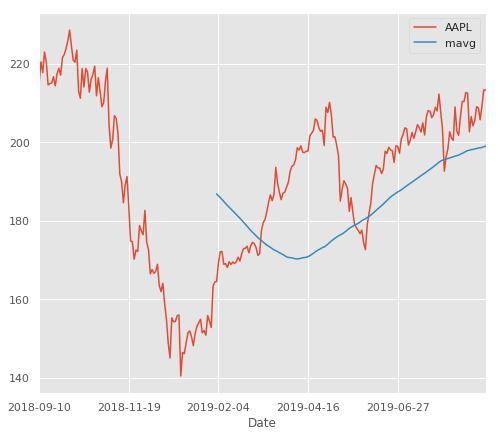

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__
# Adjusting the style of matplotlib
style.use('ggplot')
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Moving averages lag behind current price action because they are based on past prices; the longer the time period for the moving average, the greater the lag.

The Formulas For Moving Averages Are
Simple Moving Average

\begin{aligned} &SMA = \frac{A_1 + A_2 + \dotso + A_n}{n} \\ &\textbf{where:}\\ &A=\text{average in period }n\\ &n=\text{number of time periods}\\ \end{aligned} 
​	  
SMA= 
n
A 
1
​	 +A 
2
​	 +…+A 
n
​	 
​	 
where:
A=average in period n
n=number of time periods
​	

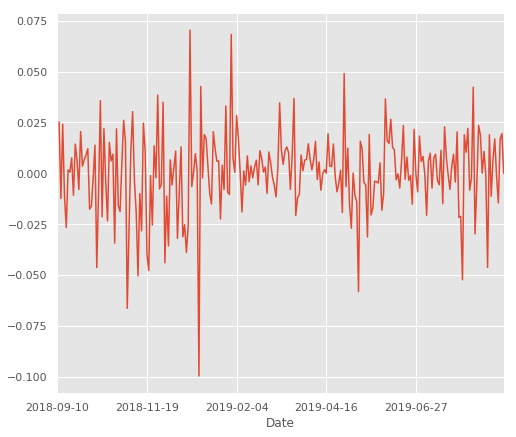

In [0]:
#plotting on returns
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

Return Deviation — to determine risk and return
Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.

# Predicting Stocks Price
We will be using three machine learning models to predict our stocks.
## Feature engineering 

In [0]:
#we will need libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline
fobjfreg = fobj.loc[:,['Adj Close', 'Volume']]

In [0]:
fobjfreg['HL_PCT'] = fobj['High']- fobj['Low']/ fobj['Close']*100.0
fobjfreg['Change'] = fobj['Close']- fobj['Open']/ fobj['Open']*100.0


# Pre-processing & Cross Validation
We will clean up and process the data using the following steps before putting them into the prediction models:
1.   Drop missing value
2.   Separating the label here, we want to predict the AdjClose
1.   Scale the X so that everyone can have the same distribution for linear regression
2.   Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
5.   Separate label and identify it as y
6. Separation of training and testing of model by cross validation train test split

In [0]:
# Drop missing value
fobjfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
import math
forecast_data = int(math.ceil(0.01 * len(fobjfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
fobjfreg['label'] = fobjfreg[forecast_col].shift(-forecast_data)
X = np.array(fobjfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
from sklearn import preprocessing 
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_data:]
X = X[:-forecast_data]
# Separate label and identify it as y
y = np.array(fobjfreg['label'])
y = y[:-forecast_data]

# Model Generation
## Simple Linear Analysis & Quadratic Discriminant Analysis
Simple Linear Analysis is a linear relationship between two or more variables. It generates a straigt line when you plot it. Quadratic Discriminant Analysis is relationsip between two variables with ploynomial characteristics producing a curved line.

In [88]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

NameError: ignored